In [4]:
import pandas as pd

In [5]:
housing = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=0)
housing.index = ['Housing'] * len(housing)
housing

,Unnamed: 0,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76


In [6]:
rental = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=1)
rental.index = ['Rental'] * len(rental)
rental

,Unnamed: 0,2019,2020,2021,2022,2023
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10


In [7]:
income = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=2)
income.index = ['Income'] * len(income)
income

,Unnamed: 0,2019,2020,2021,2022,2023
Income,DE,26105,29896,29106,28569,30308
Income,FR,26210,25382,26075,26419,27577
Income,PT,11786,12696,13113,13148,14368


In [8]:
final_df = pd.concat([housing, rental, income], ignore_index=True)
index_labels = ['Housing'] * len(housing) + ['Rental'] * len(rental) + ['Income'] * len(income)
final_df.index = index_labels

In [9]:
final_df.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
final_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
income_df = final_df[final_df.index == 'Income']
income_df

,Country,2019,2020,2021,2022,2023
Income,DE,26105.0,29896.0,29106.0,28569.0,30308.0
Income,FR,26210.0,25382.0,26075.0,26419.0,27577.0
Income,PT,11786.0,12696.0,13113.0,13148.0,14368.0


In [12]:
income_tidy = income_df.melt(id_vars="Country", var_name="Year", value_name="Income")
income_tidy

,Country,Year,Income
0,DE,2019,26105.0
1,FR,2019,26210.0
2,PT,2019,11786.0
3,DE,2020,29896.0
4,FR,2020,25382.0
5,PT,2020,12696.0
6,DE,2021,29106.0
7,FR,2021,26075.0
8,PT,2021,13113.0
9,DE,2022,28569.0


<Axes: xlabel='Year', ylabel='Income'>

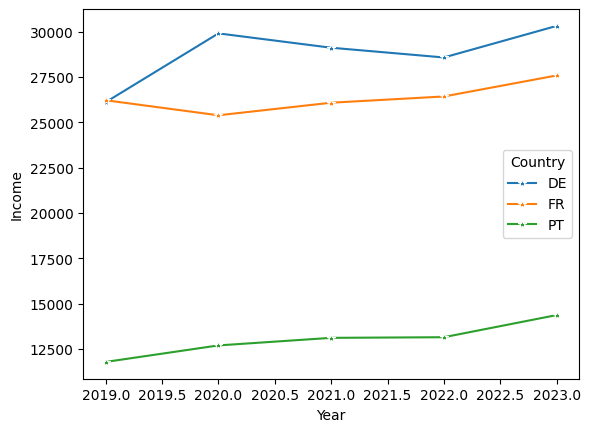

In [21]:
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="*")

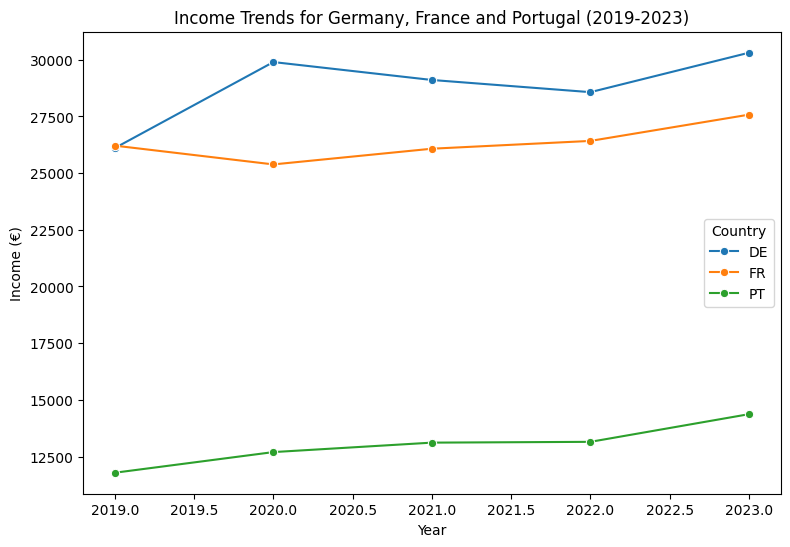

In [14]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="o")
plt.title("Income Trends for Germany, France and Portugal (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Income (€)")
plt.show()

In [15]:
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 

ModuleNotFoundError: No module named 'plotly'